# Basic Keras Tutorial

Following the tutorial from: https://www.youtube.com/watch?v=wQ8BIBpya2


In [11]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9

# this is a clean data set so its easy to unpack
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

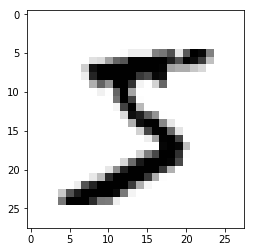

In [9]:
import matplotlib.pyplot as plt

# raw data
plt.imshow(x_train[0], cmap = plt.cm.binary)

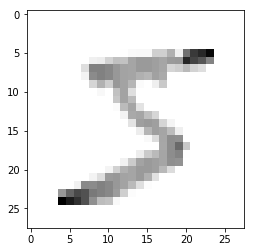

In [12]:
# normalized data
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [10]:
# raw data
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [13]:
# normalized data
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
# model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) #adding the first layer, in this case we are going to flatten the data.

# going with 2 hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #Dense(number of neurons, activation function, )
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # same type of layer, now it is a deep network

# adding the output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #Output layer should have neurons equal to classes, do not want relu for classificaiton, using softmax

# training stuff
#optimizer is important and complex, always trying to minimize loss, how we calculate this is critical
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

# trianing
model.fit(x_train, y_train, epochs=3) 

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/3
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2631 - acc: 0.9220
Epoch 2/3
60000/60000 [==============================] - 6s 101us/sample - loss: 0.1059 - acc: 0.9676
Epoch 3/3
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0728 - acc: 0.9775


In [15]:
# that accuracy is in-sample, so it is great, now we need to see if it generalized rather than just memorizing all the sampples
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 53us/sample - loss: 0.0843 - acc: 0.9742
0.08432524850452319 0.9742


In [16]:
model.save('epic_num_reader.model')

In [17]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [18]:
new_model.predict([x_test])

AttributeError: 'list' object has no attribute 'shape'

In [21]:
# these are one hot arrays, probability distributions
preds = model.predict([x_test])
preds

array([[9.5379029e-09, 1.0735075e-07, 1.8998575e-05, ..., 9.9933892e-01,
        4.9761053e-07, 4.6428672e-06],
       [2.3943880e-08, 9.4625546e-04, 9.9905342e-01, ..., 1.0680542e-08,
        3.4951184e-10, 6.5742009e-11],
       [6.5512779e-08, 9.9957544e-01, 1.7133201e-05, ..., 1.7671582e-04,
        1.2815879e-04, 4.3907426e-06],
       ...,
       [2.6579308e-10, 1.6943808e-08, 4.2595003e-09, ..., 7.2856456e-06,
        2.9060137e-08, 2.4418838e-05],
       [2.7773638e-07, 6.1469609e-07, 6.1275633e-09, ..., 1.5646762e-06,
        5.3259265e-03, 6.1089685e-07],
       [3.3207601e-07, 2.8915651e-06, 1.5858226e-06, ..., 1.8703268e-09,
        4.5605751e-07, 2.4351182e-08]], dtype=float32)

In [23]:
import numpy as np
print(np.argmax(preds[0]))

7


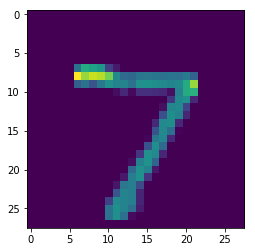

In [24]:
plt.imshow(x_test[0])
plt.show()